In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import hamming

In [2]:
def match(des, des1):
    cust_matches1 = []

    for i in range(des[:,0].shape[0]):
        min_dist = math.inf
        idx = 0

        for j in range(des1[:,0].shape[0]):
            dist = hamming(des[i], des1[j])

            if dist < min_dist:
                min_dist = dist
                idx = j

        cust_matches1.append(cv2.DMatch(_distance=min_dist, _trainIdx=idx, _queryIdx=i, _imgIdx=0))
    return cust_matches1

In [3]:
def akazu(path, path1):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
    
    #detec point
    detector = cv2.AKAZE_create()
    (kp, des) = detector.detectAndCompute(img, None)
    (kp1, des1) = detector.detectAndCompute(img1, None)
    
    #matches
    matches = match(des, des1)
    matches = sorted(matches, key = lambda x:x.distance)
    
    #display
    cust_res1 = cv2.drawMatches(img, kp, img1, kp1, matches[:15], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize = (15, 15))
    plt.imshow(cust_res1)
    plt.axis('off')
    plt.show()

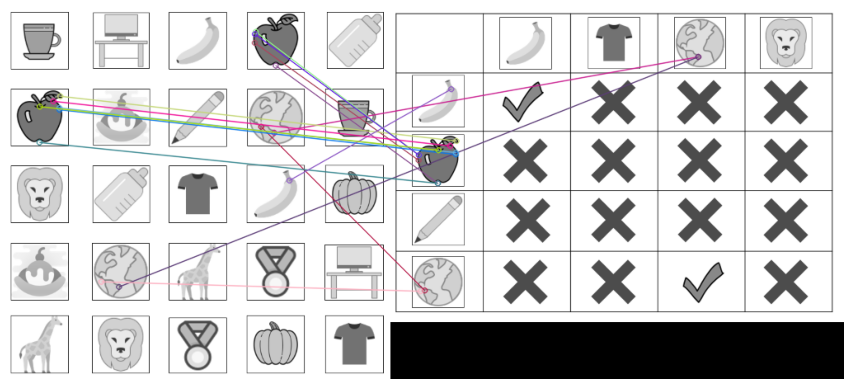

In [10]:
akazu("1.png","2.png")

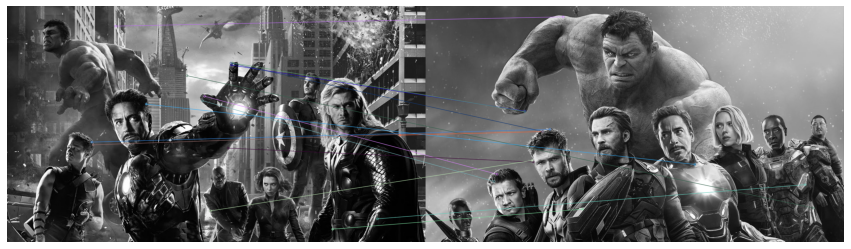

In [9]:
akazu("im1.jpg","im3.jpg")